In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,NaN,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,0.0,NaN,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0.0,NaN,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,NaN,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,NaN,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,NaN,0.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,NaN,...,0.95378,-0.04202,0.83479,0.00123,NaN,0.12815,0.86660,-0.10714,NaN,-0.04307
347,NaN,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,NaN,0.04712
348,1.0,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,NaN,-0.00577
349,NaN,0.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	52
float64		column 2	69
float64		column 3	52
float64		column 4	52
float64		column 5	17
float64		column 6	17
float64		column 7	17
float64		column 8	18
float64		column 9	17
float64		column 10	35
float64		column 11	17
float64		column 12	51
float64		column 13	35
float64		column 14	34
float64		column 15	34
float64		column 16	51
float64		column 17	34
float64		column 18	69
float64		column 19	35
float64		column 20	35
float64		column 21	34
float64		column 22	34
float64		column 23	35
float64		column 24	52
float64		column 25	17
float64		column 26	18
float64		column 27	35
float64		column 28	35
float64		column 29	34
float64		column 30	35
float64		column 31	17
float64		column 32	17
float64		column 33	52
float64		column 34	17


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,299.000000,282.0,299.000000,299.000000,334.000000,334.000000,334.000000,333.000000,334.000000,316.000000,...,334.000000,333.000000,316.000000,316.000000,317.000000,316.000000,334.000000,334.000000,299.000000,334.000000
mean,0.886288,0.0,0.663129,0.030149,0.616159,0.122911,0.557602,0.113876,0.513182,0.169071,...,0.388790,-0.068015,0.556573,-0.067809,0.389622,-0.021120,0.355682,0.004535,0.339002,0.025441
std,0.317994,0.0,0.488175,0.415400,0.494619,0.450710,0.479976,0.513359,0.506905,0.465980,...,0.572095,0.506814,0.494579,0.519105,0.552094,0.476349,0.566270,0.498539,0.495115,0.460426
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.518745,-0.064735,0.428673,-0.023920,0.251653,-0.054050,0.121690,-0.046600,...,0.000000,-0.300630,0.332323,-0.329200,0.000000,-0.210782,0.000000,-0.229030,0.000000,-0.132773
50%,1.000000,0.0,0.875780,0.007100,0.811145,0.023915,0.728000,0.013860,0.682430,0.016600,...,0.531010,-0.015050,0.698280,-0.017685,0.496640,0.000000,0.446875,0.000000,0.395590,0.000000
75%,1.000000,0.0,1.000000,0.164010,1.000000,0.335317,0.965225,0.382610,0.946882,0.459645,...,0.895620,0.154450,1.000000,0.145182,0.859770,0.149145,0.843350,0.200935,0.757805,0.173570
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

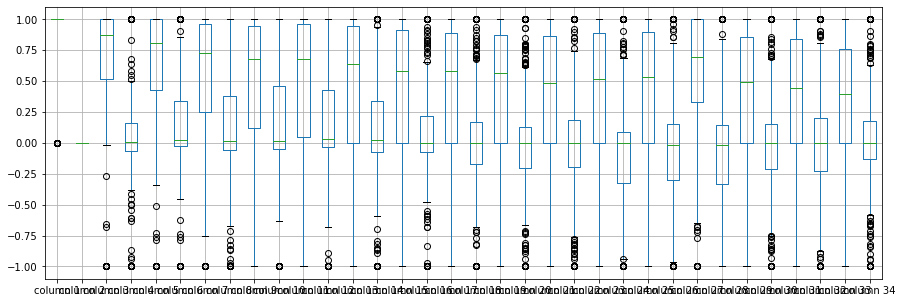

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.886288
column 2     0.000000
column 3     0.663129
column 4     0.030149
column 5     0.616159
column 6     0.122911
column 7     0.557602
column 8     0.113876
column 9     0.513182
column 10    0.169071
column 11    0.495488
column 12    0.164457
column 13    0.412404
column 14    0.084302
column 15    0.352596
column 16    0.053286
column 17    0.370434
column 18    0.002447
column 19    0.364964
column 20   -0.013573
column 21    0.337561
column 22    0.013224
column 23    0.362371
column 24   -0.071415
column 25    0.388790
column 26   -0.068015
column 27    0.556573
column 28   -0.067809
column 29    0.389622
column 30   -0.021120
column 31    0.355682
column 32    0.004535
column 33    0.339002
column 34    0.025441
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.311719,-0.005768,0.106181,0.091969,0.237081,-0.003595,0.199973,-0.031470,...,0.048573,0.192460,-0.208901,0.003614,0.134646,-0.091727,0.143285,-0.141288,0.236707,-0.001738
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.311719,NaN,1.000000,0.093598,0.480242,0.057556,0.499180,-0.017152,0.444705,0.089023,...,0.310170,-0.012854,0.115815,0.162146,0.314371,0.051152,0.206652,0.038993,0.268387,-0.000571
column 4,-0.005768,NaN,0.093598,1.000000,-0.037744,-0.273114,-0.048012,0.171120,-0.268420,0.167022,...,-0.062353,-0.287330,-0.073495,0.025788,-0.094171,0.255582,-0.136796,-0.106650,-0.061707,0.010895
column 5,0.106181,NaN,0.480242,-0.037744,1.000000,0.059156,0.545851,-0.033267,0.466409,0.024698,...,0.222101,-0.062969,0.181492,0.212030,0.267020,0.055212,0.421176,0.105222,0.346455,-0.094309
column 6,0.091969,NaN,0.057556,-0.273114,0.059156,1.000000,-0.022366,0.255941,-0.091587,0.137209,...,-0.200064,0.051804,-0.179091,-0.026421,-0.097134,-0.133285,-0.138988,0.282365,-0.013364,0.128987
column 7,0.237081,NaN,0.499180,-0.048012,0.545851,-0.022366,1.000000,-0.170547,0.493572,-0.093550,...,0.318862,0.086763,0.095905,0.089255,0.333565,0.005924,0.402037,-0.043969,0.567887,-0.075398
column 8,-0.003595,NaN,-0.017152,0.171120,-0.033267,0.255941,-0.170547,1.000000,-0.339034,0.338162,...,-0.169702,-0.133006,-0.237825,0.038716,-0.100153,0.043700,-0.154325,0.109753,-0.170903,0.335563
column 9,0.199973,NaN,0.444705,-0.268420,0.466409,-0.091587,0.493572,-0.339034,1.000000,-0.213605,...,0.352187,0.098830,0.199053,0.130355,0.353599,-0.022413,0.309793,-0.049826,0.373507,-0.090221
column 10,-0.031470,NaN,0.089023,0.167022,0.024698,0.137209,-0.093550,0.338162,-0.213605,1.000000,...,-0.195028,0.049605,-0.235296,0.166661,-0.077519,0.082561,-0.137899,0.040951,-0.186705,0.128587


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+24,34+24+24,34+24+24+24,34+24+24+24+24,34+24+24+24,34+24+24,34+24,34], vae_layer = False, seed = 240)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 18.063622338431223
Epoch: 1 , loss: 18.035362924848283
Epoch: 2 , loss: 18.011547906058176
Epoch: 3 , loss: 17.964798972720192
Epoch: 4 , loss: 17.775557972136
Epoch: 5 , loss: 17.841345514569962
Epoch: 6 , loss: 17.747599147614977
Epoch: 7 , loss: 17.79427396683466
Epoch: 8 , loss: 17.65940965924944
Epoch: 9 , loss: 17.496224721272785
Epoch: 10 , loss: 17.585075514657156
Epoch: 11 , loss: 17.35207480476016
Epoch: 12 , loss: 17.152051834833053
Epoch: 13 , loss: 16.671790350051154
Epoch: 14 , loss: 16.1111573718843
Epoch: 15 , loss: 15.653178759983607
Epoch: 16 , loss: 15.636913435799736
Epoch: 17 , loss: 15.493492853073846
Epoch: 18 , loss: 15.381224541437058
Epoch: 19 , loss: 15.356561024983725
Epoch: 20 , loss: 15.23206579117548
Epoch: 21 , loss: 15.425107728867303
Epoch: 22 , loss: 15.25585192725772
Epoch: 23 , loss: 15.372973351251511
Epoch: 24 , loss: 15.187207085745674
Epoch: 25 , loss: 15.200000

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.000000
column 2     0.000000
column 3     1.000000
column 4     1.000000
column 5     0.000000
column 6     0.010621
column 7     0.000000
column 8     0.000000
column 9    -1.000000
column 10   -1.000000
column 11    0.000000
column 12    0.000000
column 13    0.000000
column 14    0.000000
column 15   -1.000000
column 16   -1.000000
column 17   -1.000000
column 18   -1.000000
column 19   -1.000000
column 20    1.000000
column 21   -1.000000
column 22    1.000000
column 23    0.000000
column 24    0.000000
column 25    0.000000
column 26    0.000000
column 27    1.000000
column 28   -1.000000
column 29   -1.000000
column 30   -0.005214
column 31   -1.000000
column 32    1.000000
column 33   -1.000000
column 34    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.100631,0.000000,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.000000,-0.710328,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.000000,-0.644542,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.695494,0.000000,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.187371,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,-0.631773,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.082235,...,0.00000,0.0,0.0,0.0,-0.765069,0.0,0.0,0.0,-0.688829,0.0
347,-0.354997,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.524822,0.0
348,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.068912,0.0
349,-0.211892,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

20.910372376689185

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.3054385139680668

In [19]:
new_df.iloc[66,:]

column 1     0.515036
column 2     0.000000
column 3     1.000000
column 4     0.280460
column 5     1.000000
column 6     0.024770
column 7     1.000000
column 8     0.077640
column 9     1.000000
column 10    0.043170
column 11    0.987620
column 12    0.332660
column 13    1.000000
column 14    0.054890
column 15    1.000000
column 16    0.043840
column 17    0.957500
column 18   -0.001016
column 19    0.404247
column 20   -0.086680
column 21    1.000000
column 22    0.041500
column 23    0.999330
column 24    0.273760
column 25    1.000000
column 26   -0.390560
column 27    0.964140
column 28   -0.021740
column 29    0.867470
column 30   -0.003761
column 31    0.945780
column 32   -0.220210
column 33    0.803550
column 34   -0.073290
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.000000,0.000000,0.995390,-0.058890,0.85243,0.023060,0.83398,-0.37708,1.100631,0.037600,...,0.56811,-0.51171,0.41078,-0.46168,0.212660,-0.34090,0.42267,-0.54487,0.186410,-0.45300
1,1.000000,0.000000,0.289672,-0.188290,0.93035,-0.361560,-0.10868,-0.93597,1.000000,-0.045490,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.190400,-0.11593,-0.16626,-0.06288,-0.137380,-0.02447
2,1.000000,0.000000,0.355458,-0.033650,1.00000,0.004850,1.00000,-0.12062,0.889650,0.011980,...,0.57528,-0.40220,0.58984,-0.22145,0.431000,-0.17365,0.60436,-0.24180,0.560450,-0.38238
3,1.000000,0.000000,1.000000,-0.451610,1.00000,1.000000,0.71216,-1.00000,0.695494,0.000000,...,1.00000,0.90695,0.51613,1.00000,1.000000,-0.20099,0.25682,1.00000,-0.323820,1.00000
4,1.000000,0.000000,1.000000,-0.024010,0.94140,0.065310,0.92106,-0.23255,0.771520,0.023381,...,0.03286,-0.65158,0.13290,-0.53206,0.024310,-0.62197,-0.05707,-0.59573,-0.046080,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.368227,0.000000,0.835080,0.082980,0.73739,-0.147060,0.84349,-0.05567,0.904410,0.036015,...,0.95378,-0.04202,0.83479,0.00123,0.234931,0.12815,0.86660,-0.10714,0.216631,-0.04307
347,0.645003,0.000000,0.951130,0.004190,0.95183,-0.027230,0.93438,-0.01920,0.945900,0.016060,...,0.94520,0.01361,0.93522,0.04925,0.931590,0.08168,0.94066,-0.00035,0.390008,0.04712
348,1.000000,0.000000,0.947010,-0.000340,0.93207,-0.032270,0.95177,-0.03431,0.955840,0.024460,...,0.93988,0.03193,0.92489,0.02542,0.921200,0.02242,0.92459,0.00442,0.858058,-0.00577
349,0.788108,0.000000,0.906080,-0.016570,0.98122,-0.019890,0.95691,-0.03646,0.857460,0.001100,...,0.91050,-0.02099,0.89147,-0.07760,0.829830,-0.17238,0.96022,-0.03757,0.874030,-0.16243


In [21]:
imputations[-1].to_excel("Ionosphere_NN_10(imp).xlsx", index=False, header=False)